In [1]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid-hospit-2023-03-31-18h01.csv", encoding="latin")
df

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6
...,...,...,...,...,...,...,...,...,...,...
338240,976,0,2023-03-31,0,0,0.0,0.0,0.0,1766,163
338241,976,1,2023-03-31,0,0,0.0,0.0,0.0,739,100
338242,976,2,2023-03-31,0,0,0.0,0.0,0.0,1002,61
338243,978,0,2023-03-31,0,0,0.0,0.0,0.0,0,0


In [4]:
reduced_df_sx = df[df['sexe'].isin([0])]

reduced_df_sx

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
6,03,0,2020-03-18,4,0,NaN,NaN,NaN,1,0
9,04,0,2020-03-18,3,1,NaN,NaN,NaN,2,0
12,05,0,2020-03-18,8,1,NaN,NaN,NaN,9,0
...,...,...,...,...,...,...,...,...,...,...
338231,972,0,2023-03-31,14,0,12.0,2.0,0.0,4669,1101
338234,973,0,2023-03-31,4,1,3.0,0.0,0.0,6330,410
338237,974,0,2023-03-31,27,5,14.0,8.0,0.0,8876,980
338240,976,0,2023-03-31,0,0,0.0,0.0,0.0,1766,163


In [7]:
# Group and sum the data per region to obtain the data for the whole country !
great_df = reduced_df_sx.groupby(['jour', 'sexe'])[["hosp", "rea", "rad", "dc"]].sum().reset_index()
great_df

,jour,sexe,hosp,rea,rad,dc
0,2020-03-18,0,2972,771,816,218
1,2020-03-19,0,4073,1002,1180,327
2,2020-03-20,0,5226,1297,1587,450
3,2020-03-21,0,5900,1453,1811,525
4,2020-03-22,0,6954,1674,2117,632
...,...,...,...,...,...,...
1104,2023-03-27,0,13113,728,861972,135936
1105,2023-03-28,0,13178,720,862458,135975
1106,2023-03-29,0,13184,734,862962,136009
1107,2023-03-30,0,13186,732,863331,136045


In [8]:
x = great_df['dc'][23]
x

8598

In [9]:



great_df['index'] = np.arange(1, len(great_df)+1)
print(great_df)

            jour  sexe   hosp   rea     rad      dc  index
0     2020-03-18     0   2972   771     816     218      1
1     2020-03-19     0   4073  1002    1180     327      2
2     2020-03-20     0   5226  1297    1587     450      3
3     2020-03-21     0   5900  1453    1811     525      4
4     2020-03-22     0   6954  1674    2117     632      5
...          ...   ...    ...   ...     ...     ...    ...
1104  2023-03-27     0  13113   728  861972  135936   1105
1105  2023-03-28     0  13178   720  862458  135975   1106
1106  2023-03-29     0  13184   734  862962  136009   1107
1107  2023-03-30     0  13186   732  863331  136045   1108
1108  2023-03-31     0  13149   709  863837  136076   1109

[1109 rows x 7 columns]


In [10]:
dc_j = [great_df['dc'][0]]

for n in great_df['index'] :
    if n < len(great_df) :
        y = great_df['dc'][n] - great_df['dc'][n - 1]
        dc_j.append(y)
    

In [11]:
great_df['dc_j'] = (dc_j)
great_df

,jour,sexe,hosp,rea,rad,dc,index,dc_j
0,2020-03-18,0,2972,771,816,218,1,218
1,2020-03-19,0,4073,1002,1180,327,2,109
2,2020-03-20,0,5226,1297,1587,450,3,123
3,2020-03-21,0,5900,1453,1811,525,4,75
4,2020-03-22,0,6954,1674,2117,632,5,107
...,...,...,...,...,...,...,...,...
1104,2023-03-27,0,13113,728,861972,135936,1105,42
1105,2023-03-28,0,13178,720,862458,135975,1106,39
1106,2023-03-29,0,13184,734,862962,136009,1107,34
1107,2023-03-30,0,13186,732,863331,136045,1108,36


In [12]:
dc_jour = (great_df['dc_j'])

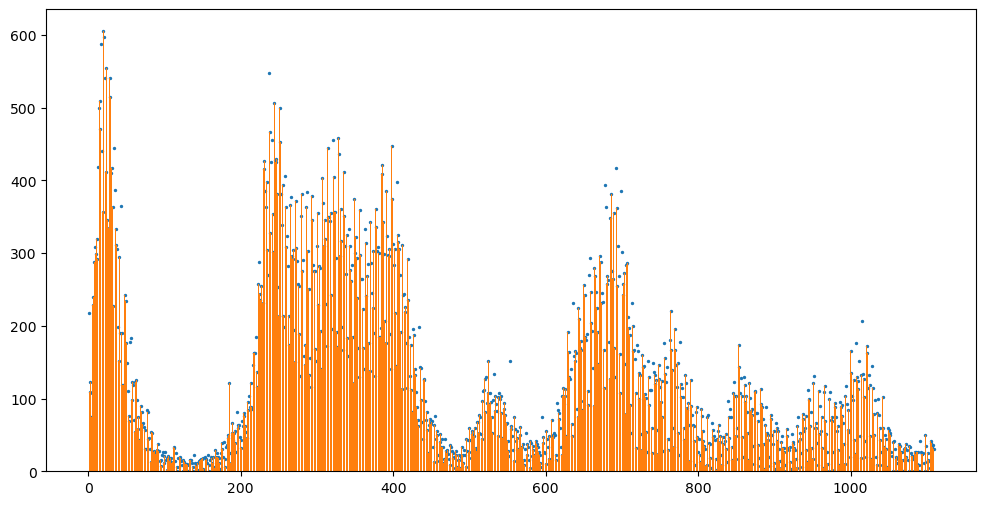

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(great_df['index'],dc_j, s=2)
ax.bar(great_df['index'],dc_j)

plt.show()

Calculer la moyenne de dc par semaine

In [14]:
moy_dc_hebd = great_df['dc_j'].rolling(7).mean()


great_df['moy_dc_hebd'] = (moy_dc_hebd)

great_df.head(15)

,jour,sexe,hosp,rea,rad,dc,index,dc_j,moy_dc_hebd
0,2020-03-18,0,2972,771,816,218,1,218,NaN
1,2020-03-19,0,4073,1002,1180,327,2,109,NaN
2,2020-03-20,0,5226,1297,1587,450,3,123,NaN
3,2020-03-21,0,5900,1453,1811,525,4,75,NaN
4,2020-03-22,0,6954,1674,2117,632,5,107,NaN
5,2020-03-23,0,8673,2080,2567,860,6,228,NaN
6,2020-03-24,0,10163,2503,3281,1100,7,240,157.142857
7,2020-03-25,0,12072,2935,4085,1388,8,288,167.142857
8,2020-03-26,0,13879,3351,4947,1696,9,308,195.571429
9,2020-03-27,0,15701,3758,5698,1995,10,299,220.714286


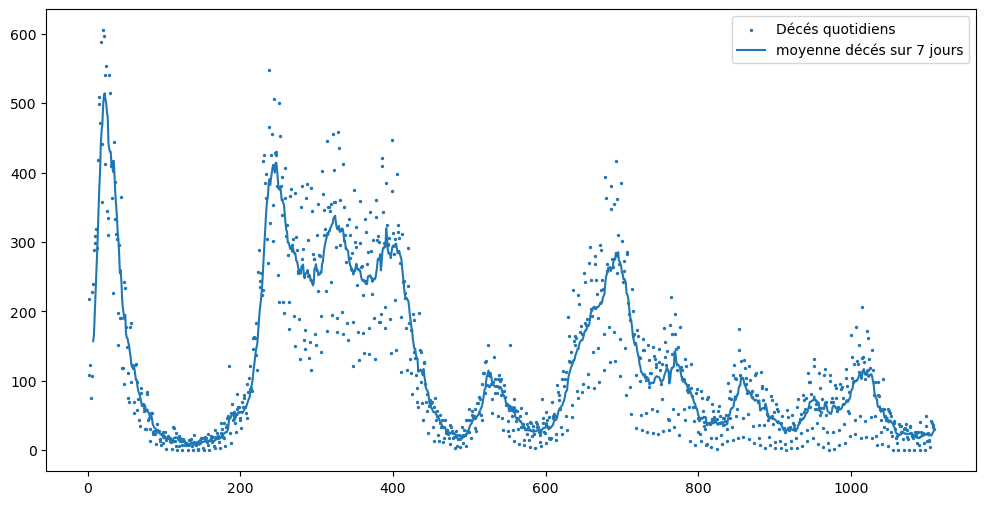

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(great_df['index'],dc_j, s=2,label='Décés quotidiens')
ax.plot(great_df['index'],moy_dc_hebd, label='moyenne décés sur 7 jours')
ax.legend()

plt.show()

In [16]:
dates = great_df[0:]["jour"]

dates = dates.apply(pd.to_datetime)

dates

0      2020-03-18
1      2020-03-19
2      2020-03-20
3      2020-03-21
4      2020-03-22
          ...    
1104   2023-03-27
1105   2023-03-28
1106   2023-03-29
1107   2023-03-30
1108   2023-03-31
Name: jour, Length: 1109, dtype: datetime64[ns]

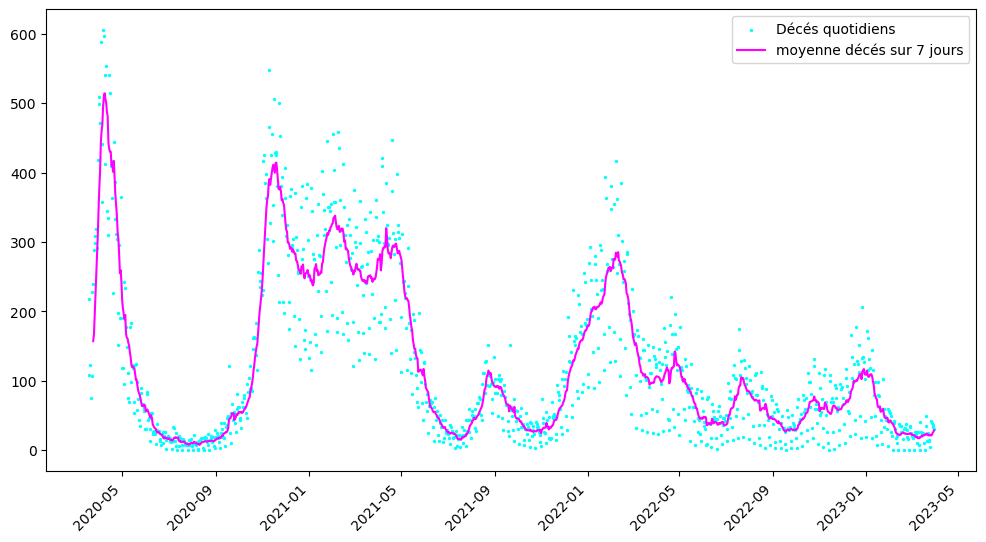

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(dates,dc_j,color='cyan', s=2,label='Décés quotidiens')
ax.plot(dates,moy_dc_hebd, color='magenta', label='moyenne décés sur 7 jours')
ax.legend()
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [18]:
great_df

,jour,sexe,hosp,rea,rad,dc,index,dc_j,moy_dc_hebd
0,2020-03-18,0,2972,771,816,218,1,218,NaN
1,2020-03-19,0,4073,1002,1180,327,2,109,NaN
2,2020-03-20,0,5226,1297,1587,450,3,123,NaN
3,2020-03-21,0,5900,1453,1811,525,4,75,NaN
4,2020-03-22,0,6954,1674,2117,632,5,107,NaN
...,...,...,...,...,...,...,...,...,...
1104,2023-03-27,0,13113,728,861972,135936,1105,42,21.285714
1105,2023-03-28,0,13178,720,862458,135975,1106,39,21.857143
1106,2023-03-29,0,13184,734,862962,136009,1107,34,24.857143
1107,2023-03-30,0,13186,732,863331,136045,1108,36,26.428571


In [19]:
great_df.iloc[370,:]  #Affiche toutes les valeurs de la ligne 'n' sur toutes les colonnes

jour           2021-03-23
sexe                    0
hosp                26756
rea                  4634
rad                283507
dc                  67503
index                 371
dc_j                  287
moy_dc_hebd    248.285714
Name: 370, dtype: object

In [20]:
def seasoning(df,n):    #définir les saison sur 1 année saisonière
    a = df[(n):(n+92)]
    n = n + 92
    b = df[(n):(n+93)]
    n = n + 93
    c = df[(n):(n+90)]
    n = n + 90
    d = df[(n):(n+90)]
    return a, b, c, d



#spring_1, sum_1, aut_1, win_1 = seasoning(great_df, 4) #seasoning sur Année 1
#spring_2, sum_2, aut_2, win_2 = seasoning(great_df, 369) #seasoning sur Année 2
#spring_3, sum_3, aut_3, win_3 = seasoning(great_df, 734) #seasoning sur Année 3

In [21]:
season = ['winter','winter','winter','winter','winter','winter']
for x in range(92) :
    season.append('spring')
for x in range(93) :
    season.append('summer')
for x in range(90) :
    season.append('automn')
for x in range(90) :
    season.append('winter')
for x in range(92) :
    season.append('spring')
for x in range(93) :
    season.append('summer')
for x in range(90) :
    season.append('automn')
for x in range(90) :
    season.append('winter')
for x in range(92) :
    season.append('spring')
for x in range(93) :
    season.append('summer')
for x in range(90) :
    season.append('automn')
for x in range(90) :
    season.append('winter')
for x in range(8) :
    season.append('spring')
    
len(season)

1109

In [22]:
great_df['season'] = season

great_df


,jour,sexe,hosp,rea,rad,dc,index,dc_j,moy_dc_hebd,season
0,2020-03-18,0,2972,771,816,218,1,218,NaN,winter
1,2020-03-19,0,4073,1002,1180,327,2,109,NaN,winter
2,2020-03-20,0,5226,1297,1587,450,3,123,NaN,winter
3,2020-03-21,0,5900,1453,1811,525,4,75,NaN,winter
4,2020-03-22,0,6954,1674,2117,632,5,107,NaN,winter
...,...,...,...,...,...,...,...,...,...,...
1104,2023-03-27,0,13113,728,861972,135936,1105,42,21.285714,spring
1105,2023-03-28,0,13178,720,862458,135975,1106,39,21.857143,spring
1106,2023-03-29,0,13184,734,862962,136009,1107,34,24.857143,spring
1107,2023-03-30,0,13186,732,863331,136045,1108,36,26.428571,spring


In [23]:
def add_column(i, w, df, x): #fonction pour ajouter colonne 'w' à tableau 'df' quand contenue de col 'x' == w
    y = []
    for n in df[i] :
        if great_df[x][n-1] == w :
            y.append(1)
        else :
            y.append(0)
    df[w] = y
    return df

In [24]:
#add_column('index', 'winter', great_df, 'season')
#add_column('index', 'spring', great_df, 'season')
#add_column('index', 'summer', great_df, 'season')
#add_column('index', 'automn', great_df, 'season')

In [25]:
#great_df['automn'][224]

great_df

,jour,sexe,hosp,rea,rad,dc,index,dc_j,moy_dc_hebd,season
0,2020-03-18,0,2972,771,816,218,1,218,NaN,winter
1,2020-03-19,0,4073,1002,1180,327,2,109,NaN,winter
2,2020-03-20,0,5226,1297,1587,450,3,123,NaN,winter
3,2020-03-21,0,5900,1453,1811,525,4,75,NaN,winter
4,2020-03-22,0,6954,1674,2117,632,5,107,NaN,winter
...,...,...,...,...,...,...,...,...,...,...
1104,2023-03-27,0,13113,728,861972,135936,1105,42,21.285714,spring
1105,2023-03-28,0,13178,720,862458,135975,1106,39,21.857143,spring
1106,2023-03-29,0,13184,734,862962,136009,1107,34,24.857143,spring
1107,2023-03-30,0,13186,732,863331,136045,1108,36,26.428571,spring


In [26]:
def add_col(w, df, x): #fonction pour ajouter colonne 'w' à tableau 'df' quand contenue de col 'x' == 'w'
    y = []
    for index, row in df.iterrows():
        if row[x] == w :
            y.append(1)
        else :
            y.append(0)
    df[w] = y
    return df

add_col('winter', great_df, 'season')
add_col('spring', great_df, 'season')
add_col('summer', great_df, 'season')
add_col('automn', great_df, 'season')

,jour,sexe,hosp,rea,rad,dc,index,dc_j,moy_dc_hebd,season,winter,spring,summer,automn
0,2020-03-18,0,2972,771,816,218,1,218,NaN,winter,1,0,0,0
1,2020-03-19,0,4073,1002,1180,327,2,109,NaN,winter,1,0,0,0
2,2020-03-20,0,5226,1297,1587,450,3,123,NaN,winter,1,0,0,0
3,2020-03-21,0,5900,1453,1811,525,4,75,NaN,winter,1,0,0,0
4,2020-03-22,0,6954,1674,2117,632,5,107,NaN,winter,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,2023-03-27,0,13113,728,861972,135936,1105,42,21.285714,spring,0,1,0,0
1105,2023-03-28,0,13178,720,862458,135975,1106,39,21.857143,spring,0,1,0,0
1106,2023-03-29,0,13184,734,862962,136009,1107,34,24.857143,spring,0,1,0,0
1107,2023-03-30,0,13186,732,863331,136045,1108,36,26.428571,spring,0,1,0,0
